# Librairies nécessaires

In [1]:
import numpy as np
import pandas as pd
import commentjson
import mlflow
from mlflow.tracking import MlflowClient
import shap
import os
import sys
import importlib


# Librairies personnelles
path = os.getcwd()
path_src = os.path.abspath(os.path.join(path, os.pardir,"../src"))
sys.path.append(path_src)
#path_mode = os.path.abspath(os.path.join(path, os.pardir,"src","modelisation"))
#sys.path.append(path_mode)

from modelisation import mlflow_functions
from modelisation import interpreter_models
importlib.reload(mlflow_functions)
importlib.reload(interpreter_models)

from modelisation import build_run_models
from utilitaires import utilitaires

## Récupération des données du run MLFLOW

In [3]:
rep_tracking_mlflow

'file:///C:/Users/33623/Dropbox (Ultiwatt)/D - ULTIVISION INDUSTRIES/4-ARCELORMITTAL/1-MUNKSJO ARCHES/2- Models/MLFLOW/Arches/Arches/AR8/ARCTIFACTS'

In [6]:
### Paramétrisation ###########################################

with open("interpretation_config.json", encoding='utf-8') as file:
    int_config = commentjson.load(file)

#experiment_name  = int_config['experiment']

experiment_name  = int_config['client']+'-'+int_config['site']+ "-" + int_config['depart'] + "-" + int_config['case_study']
###############################################################


###############################################################

rep_tracking_mlflow = "file:///"+int_config['dir_models']+int_config['client']+'/'+int_config['site']+ "/" + int_config['depart'] +'/'+'ARCTIFACTS'



#rep_tracking_mlflow = "file:///"+int_config['dir_models']+"MLFLOW"
mlflow.set_tracking_uri(rep_tracking_mlflow)

experiment = mlflow.get_experiment_by_name(experiment_name)
if not experiment:
    print("Experience mlflow non trouvée")

experiment = mlflow.get_experiment_by_name(experiment_name)

runs = MlflowClient().search_runs(
    experiment_ids = experiment.experiment_id,
    filter_string  = "attributes.`run_name` =" + "'" + int_config['run_name'] + "'"
)

if not runs:
    print("Nom de l'experience ou du run invalide")
else:
    dico_model_data = mlflow_functions.Load_Information_From_run(runs[0])

    

In [3]:
rep_tracking_mlflow

'file:///C:/Users/33623/Dropbox (Ultiwatt)/D - ULTIVISION INDUSTRIES/4-ARCELORMITTAL/2- DEPLOIEMENT AMF/2-Projet LOT 2/10-Models/MLFLOW/AMF/MZ/LM2/ARCTIFACTS'

In [8]:


dico_model_data_periode_1 = dico_model_data.copy()
dico_model_data_periode_2 = dico_model_data.copy()
data_1 = dico_model_data_periode_1['data']
data_1 = data_1[(data_1.index>='2023-05-20 00:00:00') & (data_1.index<='2023-05-25 00:00:00')]
dico_model_data_periode_1['data'] = data_1

data_2 = dico_model_data_periode_2['data']
data_2 = data_2[(data_2.index>='2023-05-20 00:00:00') & (data_2.index<='2023-05-27 00:00:00')]
dico_model_data_periode_2['data'] = data_2


svals2, df_x2,f_name_2 = interpreter_models.Compute_Shape_Values(dico_model_data_periode_2)
df_svals_periode2 = pd.DataFrame(index=df_x2.index, columns=df_x2.columns, data=svals2)



# Calcul de shapes values

In [7]:
importlib.reload(interpreter_models)
svals, df_x,f_name = interpreter_models.Compute_Shape_Values(dico_model_data)
df_svals_periode1 = pd.DataFrame(index=df_x.index, columns=df_x.columns, data=svals)

# Création des graphes

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


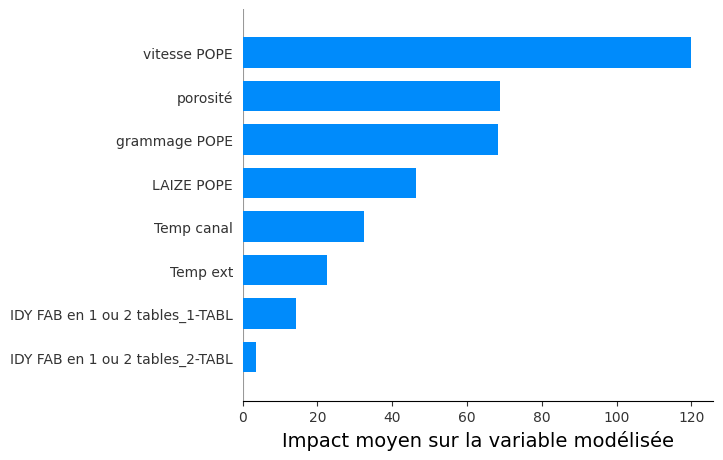

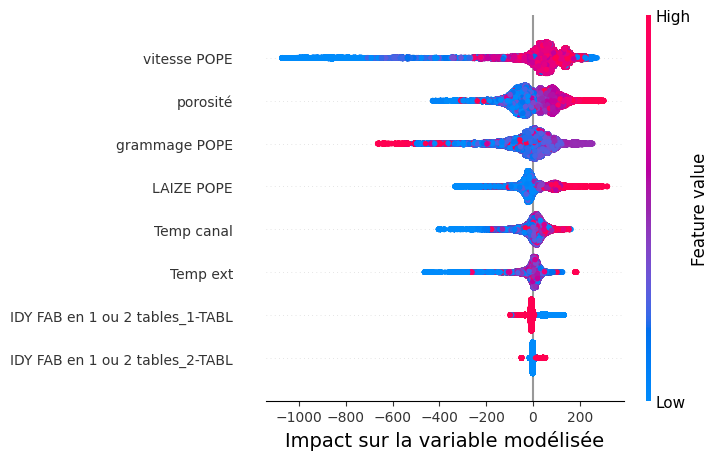

In [8]:
dico_graphes = interpreter_models.plot_graphes(svals, df_x)

# Sauvegarde des graphes

In [9]:
dico_graphes['fig_importance_fact'].savefig(int_config['tmp_file']+'importance_glob.png',bbox_inches='tight')
dico_graphes['fig_shape_fact'].savefig(int_config['tmp_file']+'importance_det.png',bbox_inches='tight')

with mlflow.start_run(run_id=runs[0].info.run_id) as run:
    mlflow.log_artifact(int_config['tmp_file']+'importance_glob.png', artifact_path="interprétation")
    mlflow.log_artifact(int_config['tmp_file']+'importance_det.png', artifact_path="interprétation")
    df_svals = pd.DataFrame(index=df_x.index,data=svals,columns=f_name)
    df_svals.to_csv(int_config['tmp_file']+'shape.csv')
    mlflow.log_artifact(int_config['tmp_file']+'shape.csv', artifact_path="interprétation")


mlflow.end_run()

# Modélisation des shape values

In [7]:
importlib.reload(interpreter_models)

with open("interpretation_config.json", encoding='utf-8') as file:
    int_config = commentjson.load(file)

#facteurs = ['EPAI_VISEE','LARG_VISEE']

#interpreter_models.create_shapeley_onnx_model(run=runs[0],facteur=facteur,int_config=int_config)

interpreter_models.create_shapeley_onnx_models(run=runs[0],int_config=int_config)

Apprentissage du modèle de: EPAI_MOY shape value
R2_train: 0.999 R2_test: 0.998
Calcul des sensibilités des facteurs
Apprentissage du modèle de: LAR_REA shape value
R2_train: 0.997 R2_test: 0.994
Calcul des sensibilités des facteurs
Apprentissage du modèle de: LG_REA shape value
R2_train: 0.999 R2_test: 0.999
Calcul des sensibilités des facteurs
Apprentissage du modèle de: T_ext shape value
R2_train: 0.995 R2_test: 0.991
Calcul des sensibilités des facteurs
Apprentissage du modèle de: T_sortie_prech shape value
R2_train: 0.995 R2_test: 0.992
Calcul des sensibilités des facteurs
Apprentissage du modèle de: T_bande_sortie_maint shape value
R2_train: 0.990 R2_test: 0.983
Calcul des sensibilités des facteurs
Apprentissage du modèle de: T_bande_sortie_refroid_lent shape value
R2_train: 0.986 R2_test: 0.967
Calcul des sensibilités des facteurs
Apprentissage du modèle de: T_bande_sortie_chauffe shape value
R2_train: 0.991 R2_test: 0.985
Calcul des sensibilités des facteurs
Apprentissage du mo

In [ ]:
rep = "C:/Users/33623/Ultiwatt Dropbox/david mouquet/D - ULTIVISION INDUSTRIES/4-ARCELORMITTAL/2- DEPLOIEMENT AMF/7-Projets 2023/2-UES MZ LM2/2 -Etudes UW/shapelay_models/"

In [ ]:
shape = pd.read_csv(rep+"shape.csv")

In [ ]:
Tagname = [c+"_Contrib" for c in shape.columns]
Tagname[0]='Tagname'
ParentScopeMangling = ['ParentScopeMangling']+['Tech.MZ.LM2.MO.INTERP.Conso_Bob']*(len(Tagname)-1)
MeasureDataType = ['MeasureDataType']+['Numeric']*(len(Tagname)-1)
TagInfoRole = ['TagInfoRole']+['Raw']*(len(Tagname)-1)
TagInfoFrequency = ['TagInfoFrequency']+['ProductUnit']*(len(Tagname)-1)
Unit = ['Unit']+['GJ']*(len(Tagname)-1)

In [ ]:
shape['Date'] = shape['Date'].apply(lambda d:d.replace('-','/'))

In [ ]:
new_columns = pd.MultiIndex.from_tuples(zip(Tagname,ParentScopeMangling,Unit,MeasureDataType,TagInfoRole,TagInfoFrequency))


In [ ]:
shape.columns = new_columns

In [ ]:
shape.to_csv(rep+"shape_uv.csv",index=False)